# CA03 – Decision Tree Algorithm

## 1. Data Source and Contents
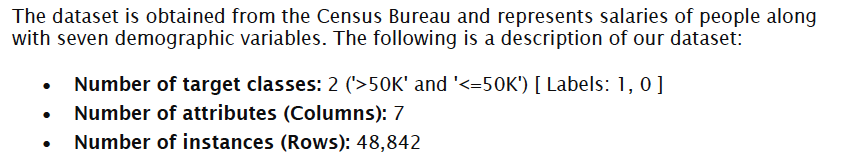

## Data Source:
Use the following exact “path” in your code as the data source:<br>
"https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"

Training and Test Data: <br>
There is a column indicating the rows to be used as “Training Data”
and “Testing Data”. <br>
You can programmatically create your Training and Testing datasets as<br>
separate dataframes in your code based on this column value.


In [40]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

In [41]:
# read the CSV

df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [54]:
print(df.head())

  hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0              31-40      Mid - Low     Mid            > 0         High   
1               0-30           High    High            = 0         High   
2              31-40            Low     Mid            = 0         High   
3              31-40            Low    High            = 0          Mid   
4              31-40           High    High            = 0          Low   

  education_num_bin education_bin workclass_bin          age_bin   flag  y  
0                13     Bachelors        income    36-40 & 56-60  train  0  
1                13     Bachelors        income            40-55  train  0  
2              9-12           Mid        income    36-40 & 56-60  train  0  
3               0-8           Low        income            40-55  train  0  
4                13     Bachelors        income   26-30 & 71-100  train  0  


In [43]:
# Look into the dataframe

print(df.shape)

(48842, 11)


In [44]:
# dataFrame statistics
print(df.describe(include = "all"))

       hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
count               48842          48842    48842          48842        48842   
unique                  5              5        3              3            3   
top              b. 31-40   c. Mid - Mid  c. High         a. = 0      c. High   
freq                26639          13971    22047          42525        29737   
mean                  NaN            NaN      NaN            NaN          NaN   
std                   NaN            NaN      NaN            NaN          NaN   
min                   NaN            NaN      NaN            NaN          NaN   
25%                   NaN            NaN      NaN            NaN          NaN   
50%                   NaN            NaN      NaN            NaN          NaN   
75%                   NaN            NaN      NaN            NaN          NaN   
max                   NaN            NaN      NaN            NaN          NaN   

       education_num_bin ed

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB
None


In [46]:
# Look into how many missing values the df has
df_num_missing = df.isna().sum()
df_num_missing

# no missing values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [47]:
# check duplicates
df.duplicated().sum()

40012

In [48]:
# check outliers

df["y"].describe()

count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [10]:
# calculate the IQR of y
df_y_Q1 = df["y"].quantile(0.25)
df_y_Q3 = df["y"].quantile(0.75)
df_y_IQR = df_y_Q3 - df_y_Q1

In [11]:
print(f"The y IQR is: {df_y_IQR}")

The y IQR is: 0.0


In [12]:
lower_lim = df_y_Q1 - 1.5 * df_y_IQR
upper_lim = df_y_Q3 + 1.5 * df_y_IQR

In [13]:
print(f"The y lower limit: {lower_lim} and the upper limit: {upper_lim}")

The y lower limit: 0.0 and the upper limit: 0.0


In [14]:
df.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [15]:
df.occupation_bin.value_counts()

c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

In [16]:
df.hours_per_week_bin.value_counts()

b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

In [17]:
df.occupation_bin.value_counts()

c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

In [18]:
df.capital_gl_bin.value_counts()

a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

In [52]:
# get rid of the (a. b. c....)
for column in df.drop(columns=["flag","y"]):
    df[column] = df[column].str.split(".", n=1, expand = True)[1]

In [53]:
print(df.head())

  hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0              31-40      Mid - Low     Mid            > 0         High   
1               0-30           High    High            = 0         High   
2              31-40            Low     Mid            = 0         High   
3              31-40            Low    High            = 0          Mid   
4              31-40           High    High            = 0          Low   

  education_num_bin education_bin workclass_bin          age_bin   flag  y  
0                13     Bachelors        income    36-40 & 56-60  train  0  
1                13     Bachelors        income            40-55  train  0  
2              9-12           Mid        income    36-40 & 56-60  train  0  
3               0-8           Low        income            40-55  train  0  
4                13     Bachelors        income   26-30 & 71-100  train  0  


## 3. Build Decision Tree Classifier Model

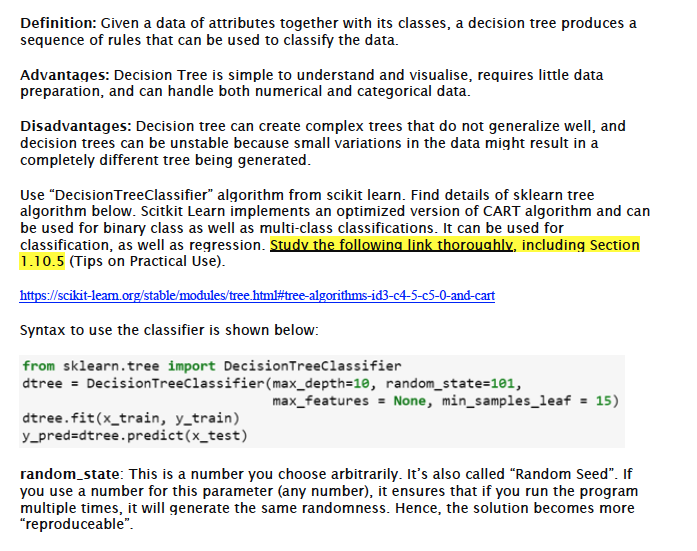

In [19]:
# read the CSV

new_df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [20]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Create a dictionary to store the transformed columns
cols_encoded = {}

# Loop through each column in the DataFrame
for col in new_df.columns:
    # Fit the LabelEncoder on the column
    le.fit(new_df[col])
    
    # Transform the column using the LabelEncoder
    cols_encoded[col] = le.transform(new_df[col])

# Replace the original columns with the encoded columns in the DataFrame
new_df = new_df.assign(**cols_encoded)

In [21]:
# Creating test and train data
train = new_df[new_df["flag"] == 1]
test = new_df[new_df["flag"] == 0]

In [22]:
# Preparing X and y variables
X_train = train.drop(["y"], axis = 1)
X_test = test.drop(["y"], axis =1)
y_train = train["y"]
y_test = test["y"]

In [23]:
# printing out train and test sets
  
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
   hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  race_sex_bin  \
0                   1               1        1               2             2   
1                   0               4        2               0             2   
2                   1               0        1               0             2   
3                   1               0        2               0             1   
4                   1               4        2               0             0   

   education_num_bin  education_bin  workclass_bin  age_bin  flag  
0                  2              2              1        3     1  
1                  2              2              1        4     1  
2                  1              1              1        3     1  
3                  0              0              1        4     1  
4                  2              2              1        1     1  

X_test : 
       hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  \
32561              

In [24]:
# Use DecisionTreeClassifier from scikit learn

dtree = DecisionTreeClassifier(max_depth = 10, 
                               random_state=101, 
                               max_features = None,
                               min_samples_leaf = 15)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

## 4. Evaluate Decision Tree Performance
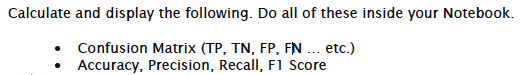

In [25]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support

In [26]:
df_table = confusion_matrix(y_test, y_pred)
print (df_table)

[[11607   828]
 [ 1715  2131]]


In [27]:
#print accuracy of the model
#In multilabel classification, this function computes subset accuracy
accuracy_score(y_test,y_pred) # accuracy score

# Printing classifier report after prediction
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.55      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.74      0.76     16281
weighted avg       0.84      0.84      0.84     16281



## 5. Tune Decision Tree Performance
Try varying FOUR of the hyperparameters manually, as per the following table, <br>
and train / score your model for each set of these hyperparameters. <br>Record your Tree’s performance
with respect to each of these sets of hyperparameters in the Model Performance section of
the following table.
<br><br>
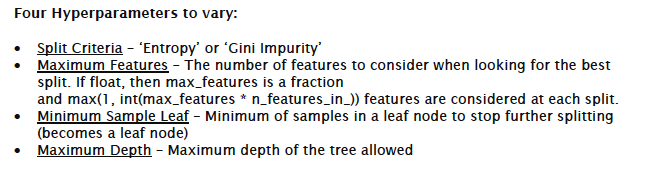
#### Decision Tree Hyper-parameter variation vs. performance
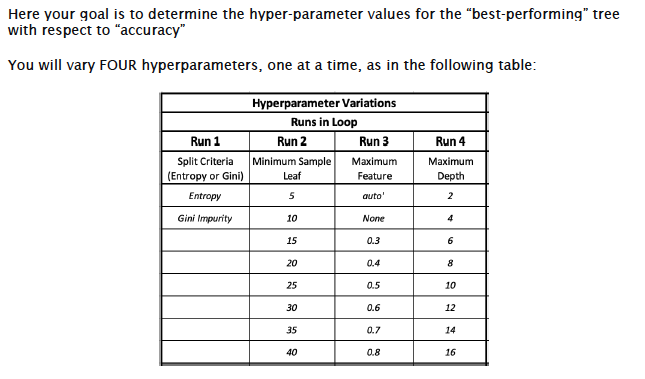 <br>
For Run 1, vary Run 1 columns only and keep other columns to "default". <br>
For Run 2, use the BEST hyper-parameter value of Split Criteria from Run 1, <br>
For Run 3 - use the BEST hyper-parameter values of Split Criteria and Minimum Sample Leaf from Run 1&2, <br>
For Run 4 use the Best values of Split Crteria, Minimum Sample Leaf, Maximum Feature from previous runs. <br>Judge the BEST hyper-parameter values with respect to "Accuracy".<br>
For each run, your will “fill up” a table with all performance parameters as follows. So, there
will be 4 tables like this for 4 runs, based on the number of rows of the hyper-parameters.
For the Split Criteria, obviously you will have two rows only.

In [28]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [29]:
tree_params = {
    "max_depth": 20,
    "min_samples_split": 10,
    "min_samples_leaf": 5,
    "max_features": "auto",
    "criterion": "entropy"
}

# Create decision tree classifier
tree = DecisionTreeClassifier(**tree_params)

In [30]:
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

criterion = ['entropy','gini']
for trees in criterion:
    model1 = DecisionTreeClassifier(criterion=trees, random_state=101)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test) 
    
    accuracy_1 = np.mean(y_test == y_pred)
    accuracy_list.append(accuracy_1.round(5))
    
    recall_1 = recall_score(y_test,y_pred)
    recall_list.append(recall_1.round(5))
    
    precision_1 = precision_score(y_test,y_pred)
    precision_list.append(precision_1.round(5))
    
    f1_score_1 = f1_score(y_test,y_pred)
    f1_score_list.append(f1_score_1.round(5))
    
criterion_table = pd.DataFrame({"Criterion": criterion, "Accuracy": accuracy_list,
                                "Recall": recall_list, "Precision": precision_list,
                                "F1 Score": f1_score_list})
    
print("Run 1 accuracy: After changing the criterion:")
print("===============================")
print(accuracy_list)
print("===============================")
print("In a table:")
print(criterion_table)



Run 1 accuracy: After changing the criterion:
[0.83637, 0.83668]
In a table:
  Criterion  Accuracy   Recall  Precision  F1 Score
0   entropy   0.83637  0.55460    0.69163   0.61558
1      gini   0.83668  0.55512    0.69251   0.61625


In [31]:
print(accuracy_list)

[0.83637, 0.83668]


In [32]:
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

min_samples_leaf = [5,10,15,20,25,30,35,40]
for trees in min_samples_leaf:
    model2 = DecisionTreeClassifier(criterion= 'gini', min_samples_leaf = trees, random_state=101)
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    
    accuracy_2 = np.mean(y_test == y_pred)
    accuracy_list.append(accuracy_2.round(5))
    
    recall_2 = recall_score(y_test,y_pred)
    recall_list.append(recall_2.round(5))
    
    precision_2 = precision_score(y_test,y_pred)
    precision_list.append(precision_2.round(5))
    
    f1_score_2 = f1_score(y_test,y_pred)
    f1_score_list.append(f1_score_2.round(5))
    
min_samples_leaf_table = pd.DataFrame({"Min_Samples_Leaf": min_samples_leaf, "Accuracy": accuracy_list,
                                "Recall": recall_list, "Precision": precision_list,
                                "F1 Score": f1_score_list})

print("Run 2: After changing the Minimum Sample Leaf:")
print("===============================")
print(accuracy_list)
print("===============================")
print("In a table:")
print(min_samples_leaf_table)

Run 2: After changing the Minimum Sample Leaf:
[0.84006, 0.8403, 0.84233, 0.84252, 0.84276, 0.84307, 0.84301, 0.84307]
In a table:
   Min_Samples_Leaf  Accuracy   Recall  Precision  F1 Score
0                 5   0.84006  0.56240    0.70136   0.62424
1                10   0.84030  0.55902    0.70399   0.62319
2                15   0.84233  0.56344    0.70933   0.62802
3                20   0.84252  0.57488    0.70414   0.63298
4                25   0.84276  0.57072    0.70715   0.63165
5                30   0.84307  0.56396    0.71185   0.62933
6                35   0.84301  0.55980    0.71386   0.62751
7                40   0.84307  0.55564    0.71639   0.62586


/Users/mic_elstan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


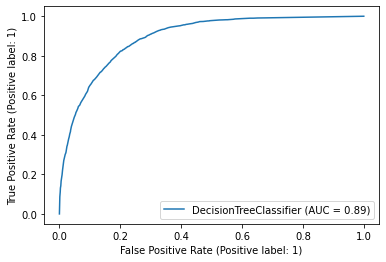

In [33]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model2, X_test, y_test)

In [34]:
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

maximum_feature = ['auto',None,0.3,0.4,0.5,0.6,0.7,0.8]
for trees in maximum_feature:
    model3 = DecisionTreeClassifier(criterion= 'gini',
                                    min_samples_leaf =40, max_features=trees, random_state=101)
    model3.fit(X_train, y_train)
    y_pred = model3.predict(X_test)
    
    accuracy_3 = np.mean(y_test == y_pred)
    accuracy_list.append(accuracy_3.round(5))
    
    recall_3 = recall_score(y_test,y_pred)
    recall_list.append(recall_3.round(5))
    
    precision_3 = precision_score(y_test,y_pred)
    precision_list.append(precision_3.round(5))
    
    f1_score_3 = f1_score(y_test,y_pred)
    f1_score_list.append(f1_score_3.round(5))
    
maximum_feature_table = pd.DataFrame({"MAximum Features": maximum_feature, "Accuracy": accuracy_list,
                                "Recall": recall_list, "Precision": precision_list,
                                "F1 Score": f1_score_list})
    
print("Run 3: After changing the Maximum Features:")
print("===============================")
print(accuracy_list)
print("===============================")
print("In a table:")
print(maximum_feature_table)

Run 3: After changing the Maximum Features:
[0.84215, 0.84307, 0.84215, 0.84172, 0.84202, 0.84503, 0.8443, 0.84374]
In a table:
  MAximum Features  Accuracy   Recall  Precision  F1 Score
0             auto   0.84215  0.56058    0.71014   0.62656
1             None   0.84307  0.55564    0.71639   0.62586
2              0.3   0.84215  0.56058    0.71014   0.62656
3              0.4   0.84172  0.55642    0.71073   0.62418
4              0.5   0.84202  0.55746    0.71135   0.62507
5              0.6   0.84503  0.56370    0.71955   0.63216
6              0.7   0.84430  0.56786    0.71443   0.63277
7              0.8   0.84374  0.56292    0.71499   0.62991


/Users/mic_elstan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


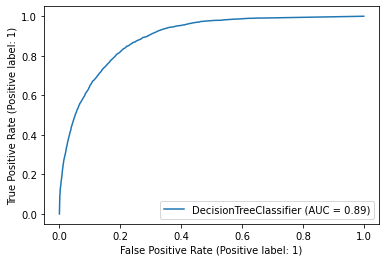

In [35]:
plot_roc_curve(model3, X_test, y_test)

In [36]:
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

max_depth_options = [2,4,6,8,10,12,14,16]
for trees in max_depth_options:
    model4 = DecisionTreeClassifier(criterion= 'gini', min_samples_leaf =40,
                                    max_features= 0.6,max_depth=trees, random_state=101)
    model4.fit(X_train, y_train)
    y_pred = model4.predict(X_test)
    
    accuracy_4 = np.mean(y_test == y_pred)
    accuracy_list.append(accuracy_4.round(5))
    
    recall_4 = recall_score(y_test,y_pred)
    recall_list.append(recall_4.round(5))
    
    precision_4 = precision_score(y_test,y_pred)
    precision_list.append(precision_4.round(5))
    
    f1_score_4 = f1_score(y_test,y_pred)
    f1_score_list.append(f1_score_4.round(5))
    
max_depth_table = pd.DataFrame({"Maximum Depth": max_depth_options, "Accuracy": accuracy_list,
                                "Recall": recall_list, "Precision": precision_list,
                                "F1 Score": f1_score_list})
print("Run 4: After changing the Maximum Depth")
print("===============================")
print(accuracy_list)
print("===============================")
print("In a table:")
print(max_depth_table)

Run 4: After changing the Maximum Depth
[0.79246, 0.83496, 0.84356, 0.84411, 0.84522, 0.84356, 0.84454, 0.84577]
In a table:
   Maximum Depth  Accuracy   Recall  Precision  F1 Score
0              2   0.79246  0.17291    0.77057   0.28244
1              4   0.83496  0.51118    0.70898   0.59405
2              6   0.84356  0.57670    0.70704   0.63526
3              8   0.84411  0.56890    0.71317   0.63292
4             10   0.84522  0.57488    0.71415   0.63699
5             12   0.84356  0.56734    0.71191   0.63146
6             14   0.84454  0.57202    0.71313   0.63483
7             16   0.84577  0.56370    0.72243   0.63327


In [37]:
# Model 5 with the best Maximum Depth, Maximum Features, Minimum Samples Leaf and Criterion

accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

model5 = DecisionTreeClassifier(criterion= 'gini', min_samples_leaf =40,
                                    max_features= 0.6,max_depth= 16, random_state=101)
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)

accuracy_5 = np.mean(y_test == y_pred)
accuracy_list.append(accuracy_5.round(5))
    
recall_5 = recall_score(y_test,y_pred)
recall_list.append(recall_5.round(5))
    
precision_5 = precision_score(y_test,y_pred)
precision_list.append(precision_5.round(5))
    
f1_score_5 = f1_score(y_test,y_pred)
f1_score_list.append(f1_score_5.round(5))
    
max_depth_table = pd.DataFrame({"Maximum Depth": max_depth_options, "Accuracy": accuracy_list,
                                "Recall": recall_list, "Precision": precision_list,
                                "F1 Score": f1_score_list})
print("Run 4: After changing the Maximum Depth")
print("===============================")
print(accuracy_list)
print("===============================")
print("In a table:")
print(max_depth_table)

ValueError: All arrays must be of the same length

In [ ]:
plot_roc_curve(model4, X_test, y_test)

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(model5, feature_names=list(X_train), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)